## Observations and Insights 

Observations: 
1)Capomulin and Ramicane are the two most effective medications among the listed ones. Of the two, Ramicane has a slightly lower maximum tumor size at the end of treatment.

2)Naftisol, Ketrapril, Stelasyn, Zoniferol performance was about the same as placebo while Propriva had a slight effect. These medicines are in general no better than a placebo and should not be used.

3)Tumor size is directly proportional to the rat weight, indicating that larger rats had, in general, larger tumors, for the Capomulin treatment.  Analysis of the overall data shows that there is no such correlation at a weight of 25 grams and above.  Notably, none of the tumors of these mice is lower than 45 mm3.  A probable source of noise may come from the ineffective treatments not changing tumor sizes and it would be better to analyze the curve for each of the effective medicines.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
mouse_study_df=pd.merge(study_results,mouse_metadata,how="outer",on="Mouse ID")
# Display the data table for preview
mouse_study_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
micenum=mouse_study_df["Mouse ID"].nunique()
print(f"There are {micenum} unique mice.")

There are 249 unique mice.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates=mouse_study_df[mouse_study_df.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
for element in duplicates["Mouse ID"].unique():
    mouse_study_df=mouse_study_df.loc[mouse_study_df["Mouse ID"]!=element]
mouse_study_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
micenum=mouse_study_df["Mouse ID"].nunique()
print(f"There are {micenum} unique mice when duplicates are removed.")

There are 248 unique mice when duplicates are removed.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
by_drug=mouse_study_df.groupby("Drug Regimen")
tumor_volume_mean=by_drug["Tumor Volume (mm3)"].mean()
tumor_volume_median=by_drug["Tumor Volume (mm3)"].median()
tumor_volume_var=by_drug["Tumor Volume (mm3)"].var()
tumor_volume_stdev=by_drug["Tumor Volume (mm3)"].std()
tumor_volume_sem=by_drug["Tumor Volume (mm3)"].sem()
regimen=by_drug["Drug Regimen"].count().keys()

Tumor_stats=pd.DataFrame({"Drug Regimen":regimen,"Mean Tumor Size":tumor_volume_mean,"Median Tumor Size":tumor_volume_median,"Variance of Tumor Size":tumor_volume_var,"Standard Dev of Tumors":tumor_volume_stdev,"Standard Error":tumor_volume_sem})
Tumor_stats

,Drug Regimen,Mean Tumor Size,Median Tumor Size,Variance of Tumor Size,Standard Dev of Tumors,Standard Error
Drug Regimen,,,,,,
Capomulin,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
by_drug=mouse_study_df.groupby("Drug Regimen")
Tumor_stats=by_drug["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem','count'])
Tumor_stats

,mean,median,var,std,sem,count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,148
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


## Bar and Pie Charts

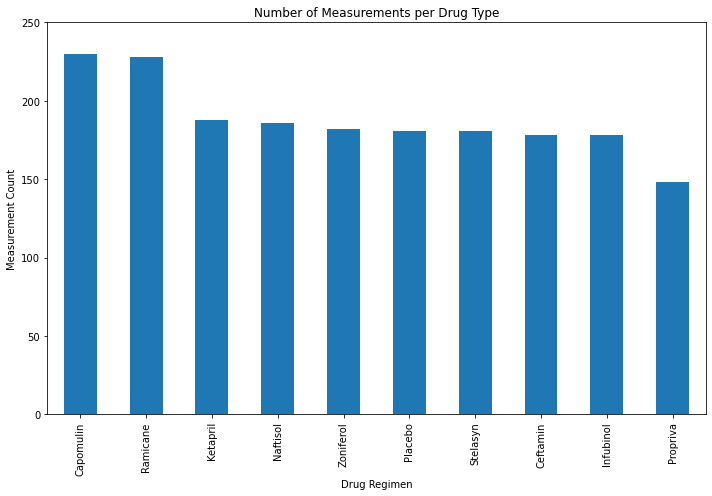

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
barplot=pd.DataFrame(mouse_study_df.groupby("Drug Regimen").count()["Sex"])
barplot=barplot.rename(columns={"Sex":"Number of Measurements"})
barplot=barplot.sort_values("Number of Measurements",ascending=False)
barplot.plot(kind="bar",figsize=(10,7),legend=False)
plt.title("Number of Measurements per Drug Type")
plt.ylabel("Measurement Count")
plt.yticks(range(0,251,50))
plt.tight_layout()
plt.show()

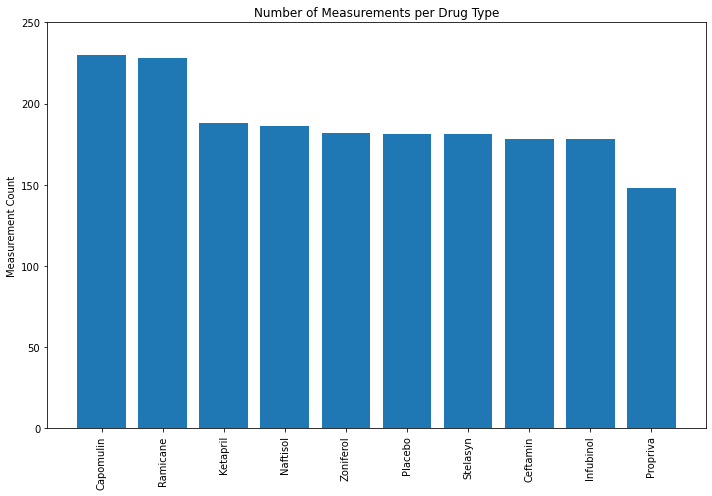

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
barplot=pd.DataFrame(mouse_study_df.groupby("Drug Regimen").count()["Sex"])
barplot=barplot.rename(columns={"Sex":"Number of Measurements"})
barplot=barplot.sort_values("Number of Measurements",ascending=False)
xax=barplot.iloc[:,0].keys()
yax=barplot["Number of Measurements"]
plt.figure(figsize=(10,7))
plt.bar(xax,yax)
plt.title("Number of Measurements per Drug Type")
plt.ylabel("Measurement Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.yticks(range(0,251,50))
plt.show()


Text(0.5, 1.0, 'Gender Proportion of Lab Rats')

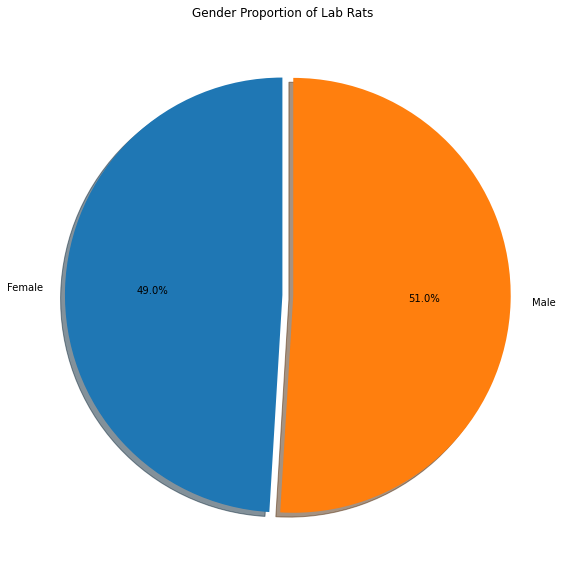

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pieplot=pd.DataFrame(mouse_study_df.groupby("Sex").count()["Drug Regimen"])
pieplot=pieplot.rename(columns={"Drug Regimen":"Number of Measurements"})
pieplot.plot(kind="pie",figsize=(10,10),legend=False,explode=[0,.05],shadow=True,startangle=90,subplots=True,autopct='%1.1f%%')
plt.xlabel("")
plt.ylabel("")
plt.title("Gender Proportion of Lab Rats")


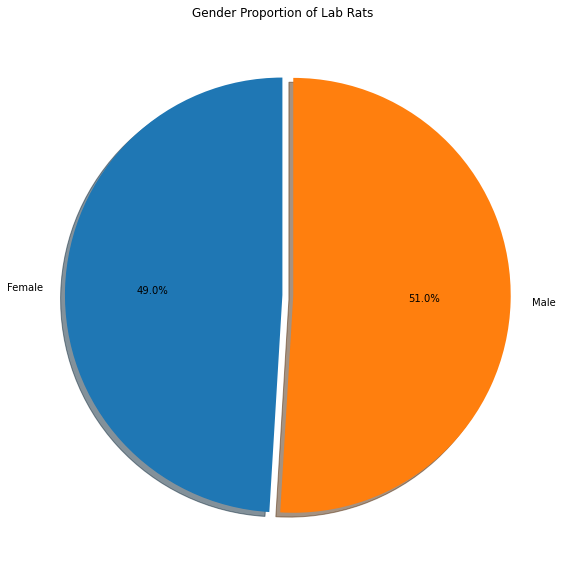

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pieplot=pd.DataFrame(mouse_study_df.groupby("Sex").count()["Drug Regimen"])
pieplot=pieplot.rename(columns={"Drug Regimen":"Number of Measurements"})
sizes=pieplot["Number of Measurements"]
labels=pieplot["Number of Measurements"].keys()
plt.figure(figsize=(10,10))
plt.pie(sizes,explode=[0,0.05],labels=labels,shadow=True,startangle=90,autopct='%1.1f%%')
plt.title("Gender Proportion of Lab Rats")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_test_result=mouse_study_df.drop_duplicates("Mouse ID",keep='last')
final_test_result
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
10,f932,0,45.000000,0,Ketapril,Male,15,29
18,g107,35,71.905117,0,Ketapril,Female,2,29
21,a457,10,49.783419,0,Ketapril,Female,11,30
30,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1857,t565,45,34.455298,0,Capomulin,Female,20,17
1867,i557,45,47.685963,1,Capomulin,Female,1,24
1877,m957,45,33.329098,1,Capomulin,Female,3,19
1882,f966,20,30.485985,0,Capomulin,Male,16,17


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvolumes=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumorvolume=final_test_result.loc[final_test_result["Drug Regimen"]==treatment]
    # add subset 
    tumorvolumes.append(tumorvolume["Tumor Volume (mm3)"])

    # Determine outliers using upper and lower bounds
    quartiles = tumorvolume["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"\nFor the treatment of {treatment}:")
    print(f"The lower quartile for {treatment} is: {lowerq}")
    print(f"The upper quartile for {treatment} is: {upperq}")
    print(f"The interquartile range for {treatment} is: {iqr}")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")


For the treatment of Capomulin:
The lower quartile for Capomulin is: 32.37735684
The upper quartile for Capomulin is: 40.1592203
The interquartile range for Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

For the treatment of Ramicane:
The lower quartile for Ramicane is: 31.56046955
The upper quartile for Ramicane is: 40.65900627
The interquartile range for Ramicane is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

For the treatment of Infubinol:
The lower quartile for Infubinol is: 54.04860769
The upper quartile for Infubinol is: 65.52574285
The interquartile range for Infubinol is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

For the treatment of Ceftamin:
The lower quartile for Ceftamin is: 48.72207785
The upper quartile for Ceftamin is: 64.29983003
The interquart

<Figure size 720x720 with 0 Axes>

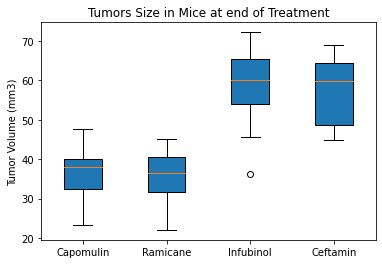

In [61]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(10,10))
fig1, ax1 = plt.subplots()
ax1.set_title('Tumors Size in Mice at end of Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
#for element in range(0,len(treatments)):
flierprops=dict(color='red', markeredgecolor='black'),
boxes=plt.boxplot(tumorvolumes,labels=treatments,patch_artist=True)
plt.setp(boxes["fliers"],color='red', markeredgecolor='black')
plt.show()


## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Size Progression for Mouse ID:m601')

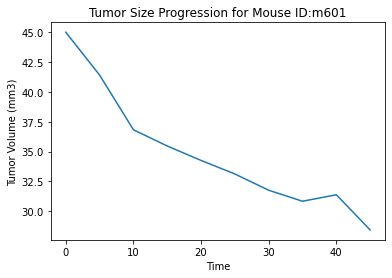

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouselabel="m601"
samplemouse=mouse_study_df.loc[mouse_study_df["Mouse ID"]==mouselabel]
samplemouse=samplemouse[["Timepoint","Tumor Volume (mm3)"]]
samplemouse.plot(kind="line",x="Timepoint",y="Tumor Volume (mm3)",legend=False)
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Size Progression for Mouse ID:{mouselabel}")


Text(0.5, 1.0, 'Tumor Volume Vs Mouse Weight')

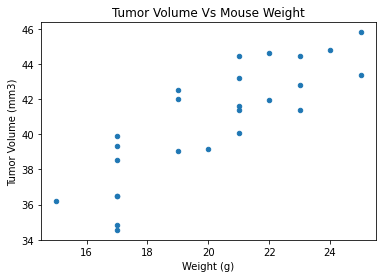

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight=mouse_study_df.loc[mouse_study_df["Drug Regimen"]==treatments[0]]
weight=weight.groupby("Mouse ID").mean()
#weight["Tumor Volume (mm3)"]
weight.plot(kind="scatter",y="Tumor Volume (mm3)",x="Weight (g)")
plt.title("Tumor Volume Vs Mouse Weight")

## Correlation and Regression

Text(0, 0.5, 'Tumor Volume (mm3)')

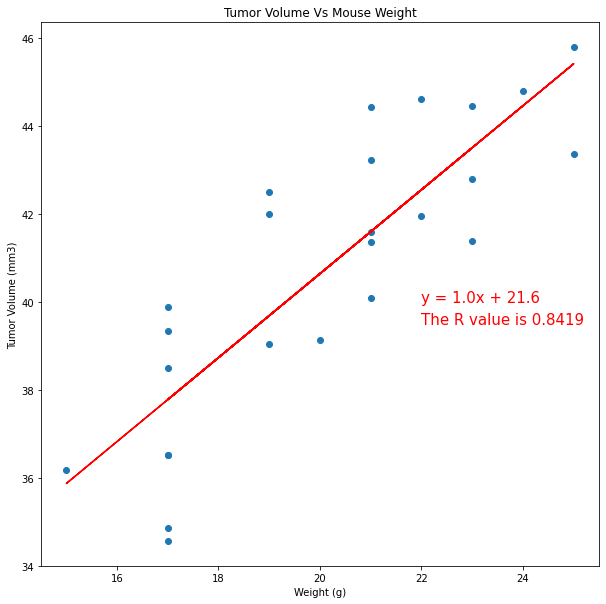

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values=weight["Weight (g)"]
y_values=weight["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
values=x_values*slope+intercept
line_equation="y = "+str(round(slope,1))+"x + "+str(round(intercept,1))
plt.figure(figsize=(10,10))
plt.scatter(x_values,y_values)
plt.plot(x_values,values,color="red")
plt.annotate(line_equation,(22,40),fontsize="15",color="red")
rvalue=round(rvalue,4)
plt.annotate(f"The R value is {rvalue}",(22,39.5),fontsize="15",color="red")
plt.title("Tumor Volume Vs Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Tumor Volume (mm3)')

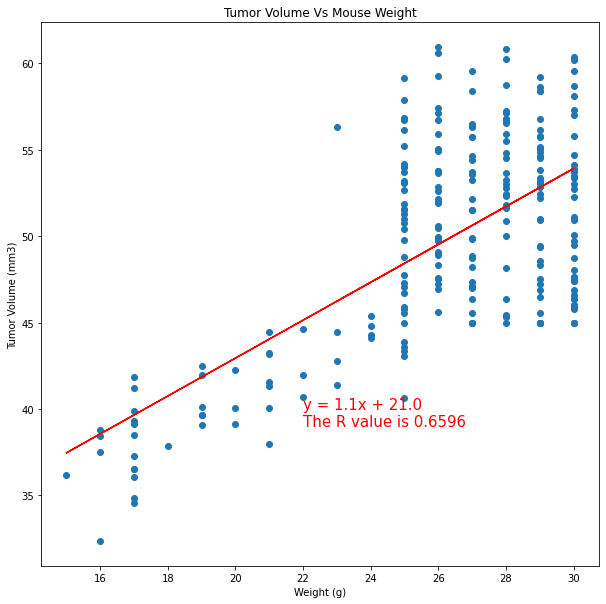

In [64]:
weight=mouse_study_df.groupby("Mouse ID").mean()
x_values=weight["Weight (g)"]
y_values=weight["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
values=x_values*slope+intercept
line_equation="y = "+str(round(slope,1))+"x + "+str(round(intercept,1))
plt.figure(figsize=(10,10))
plt.scatter(x_values,y_values)
plt.plot(x_values,values,color="red")
plt.annotate(line_equation,(22,40),fontsize="15",color="red")
rvalue=round(rvalue,4)
plt.annotate(f"The R value is {rvalue}",(22,39),fontsize="15",color="red")
plt.title("Tumor Volume Vs Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")